# Estimation of obesity levels based on eating habits and physical condition

 ## Features
 * Gender {Female,Male}
 * Age numeric
 * Height numeric
 * Weight numeric
 * family_history_with_overweight {yes,no}
 * FAVC {yes,no} ====> Do you eat high caloric food frequently?
 * FCVC numeri ====> Do you usually eat vegetables in your meals?
 * NCP numeric ====>  main meals do you have daily
 * CAEC {no,Sometimes,Frequently,Always} ====> eat any food between meals?
 * SMOKE {yes,no}
 * CH2O numeric ====> water do you drink daily?
 * SCC {yes,no} ====> monitor the calories you eat daily?
 * FAF numeric ====> How often do you have physical activity?
 * TUE numeric ====> Time using technology
 * CALC {no,Sometimes,Frequently,Always} ====> how often do you drink alcohol?
 * MTRANS {Automobile,Motorbike,Bike,Public_Transportation,Walking}
 * NObeyesdad {Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III}

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import joblib

sns.set(rc={'figure.figsize': (10, 8)}, font_scale=1.2)

## Importing and analysing DATA

In [2]:
df = pd.read_csv('ObesityDataSet.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
df[['FCVC', 'NCP', 'FAF']] = df[['FCVC', 'NCP', 'FAF']].apply(round)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.0,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.0,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.0,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.0,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.0,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,2.0,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.0,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.0,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.0,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Rounded these columns to be reasonable

In [6]:
numerical = ['Age', 'Height', 'Weight', 'CH2O', 'TUE']
ordinial = ['NObeyesdad', 'CALC', 'CAEC', 'FCVC', 'FAF',  'NCP']
nominal = ['MTRANS', 'SCC', 'SMOKE', 'FAVC',
           'Gender', 'family_history_with_overweight']

<AxesSubplot:>

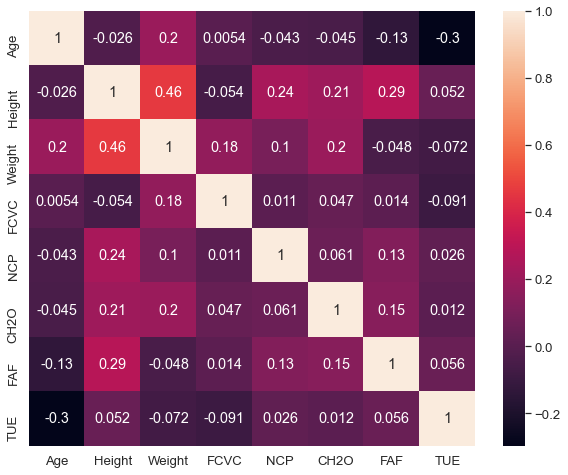

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
for col in ordinial+nominal:
    print(col, '\n')
    print(df[col].value_counts(), '\n')
    print('*'*50)

NObeyesdad 

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64 

**************************************************
CALC 

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64 

**************************************************
CAEC 

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64 

**************************************************
FCVC 

2.0    1013
3.0     996
1.0     102
Name: FCVC, dtype: int64 

**************************************************
FAF 

1.0    776
0.0    720
2.0    496
3.0    119
Name: FAF, dtype: int64 

**************************************************
NCP 

3.0    1470
1.0     316
2.0     176
4.0     149
Name: NCP, dtype: int64 

**************************************************
MTRANS 

Publ

## Visualization

<AxesSubplot:xlabel='Age', ylabel='Count'>

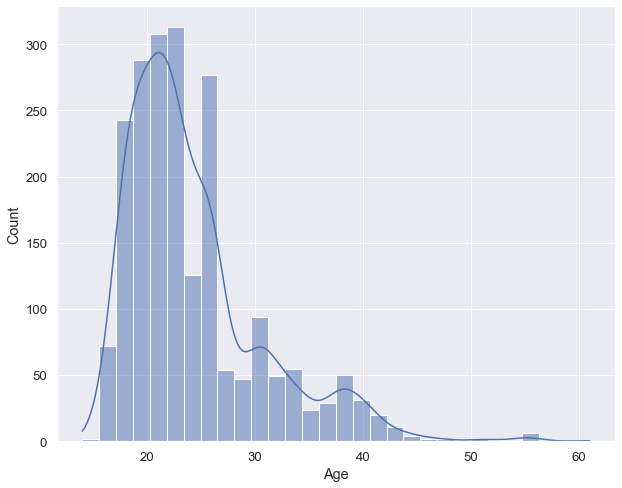

In [9]:
sns.histplot(df['Age'], bins=30, kde=True)

<AxesSubplot:xlabel='Height', ylabel='Count'>

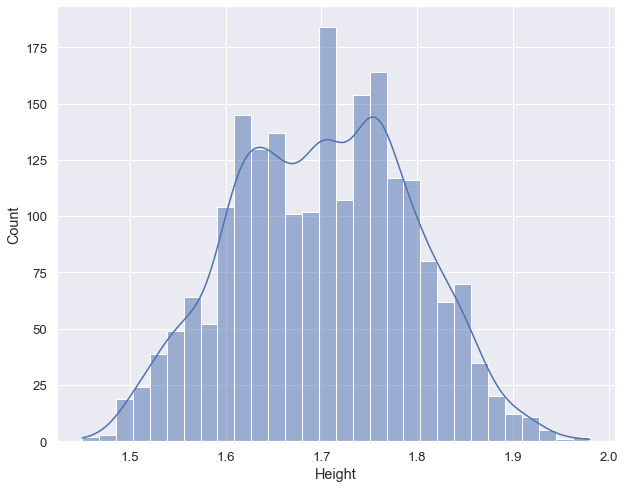

In [10]:
sns.histplot(df['Height'], bins=30, kde=True)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

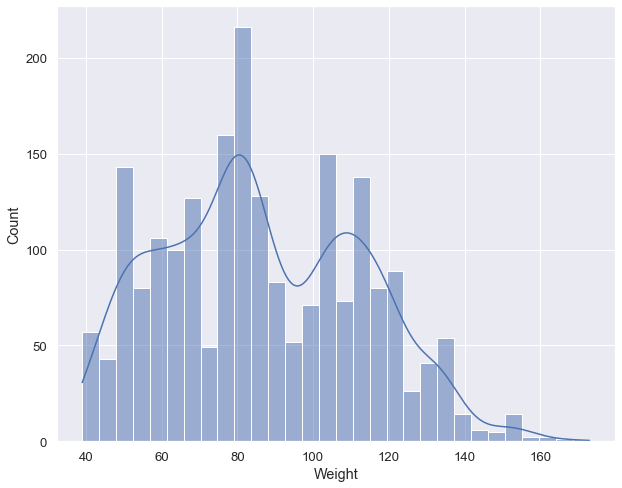

In [11]:
sns.histplot(df['Weight'], bins=30, kde=True)

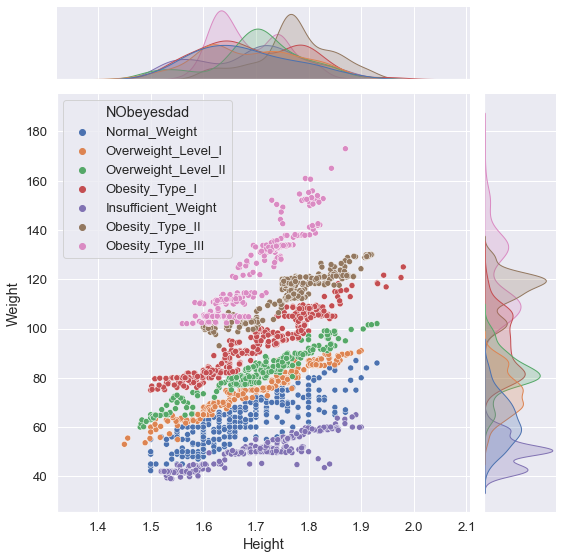

In [12]:
sns.jointplot(x='Height', y='Weight', data=df, hue='NObeyesdad', height=8)

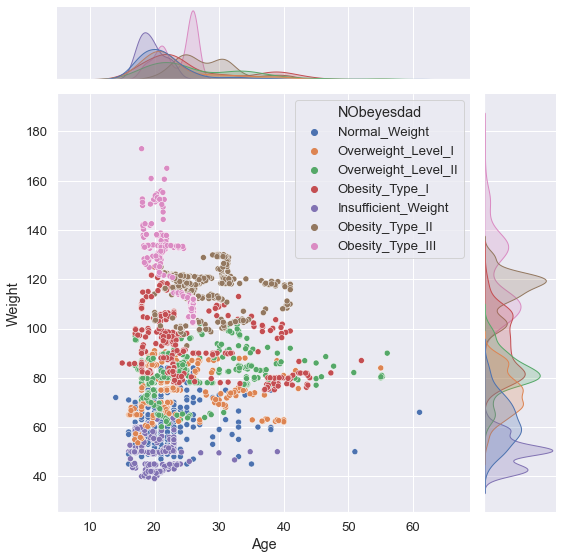

In [13]:
sns.jointplot(x='Age', y='Weight', data=df, hue='NObeyesdad', height=8)

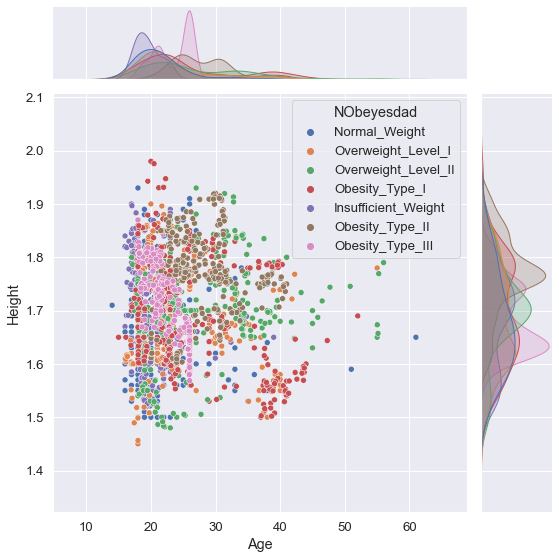

In [14]:
sns.jointplot(x='Age', y='Height', data=df, hue='NObeyesdad', height=8)

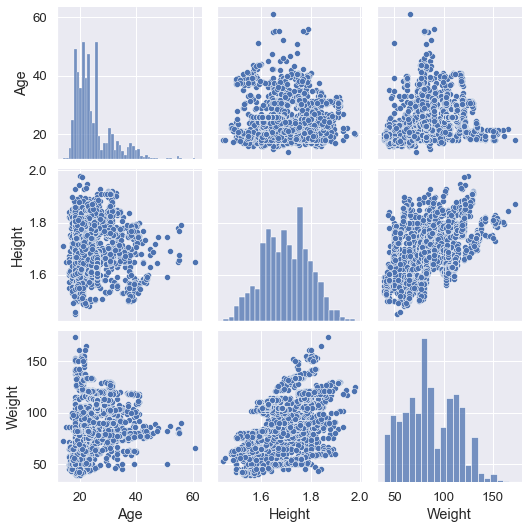

In [15]:
sns.pairplot(df[['Age', 'Height', 'Weight']])

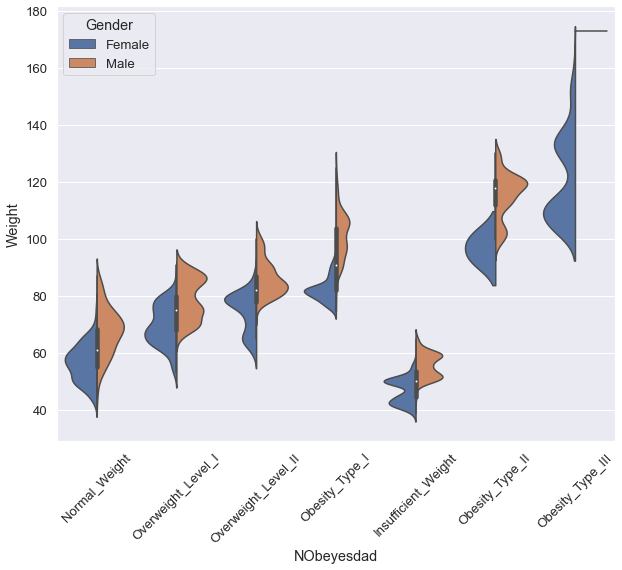

In [16]:
sns.violinplot(x='NObeyesdad', y='Weight', data=df,
               hue='Gender', split=True)
plt.xticks(rotation=45)
None

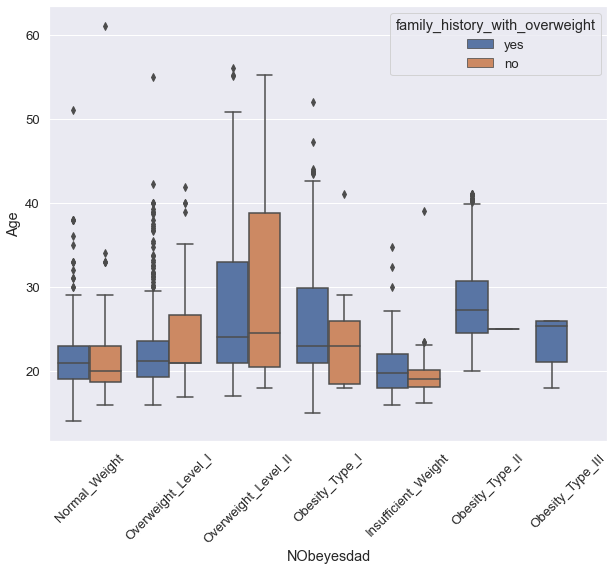

In [17]:
sns.boxplot(x='NObeyesdad', y='Age', data=df,
            hue='family_history_with_overweight')
plt.xticks(rotation=45)
None

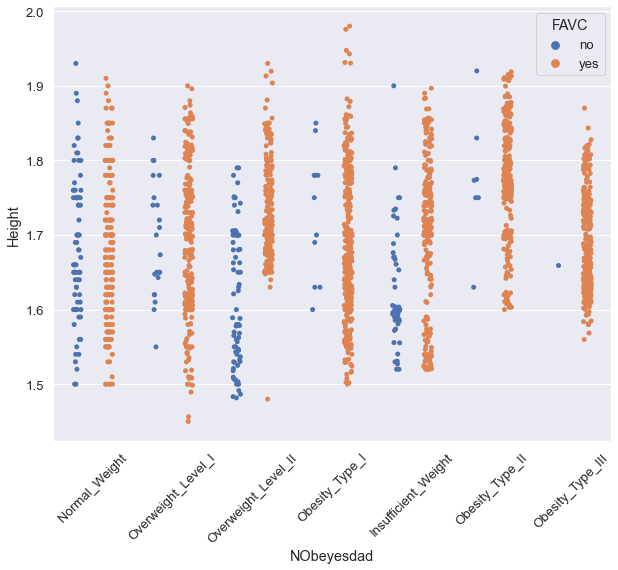

In [18]:
sns.stripplot(x='NObeyesdad', y='Height', data=df,
              hue='FAVC', dodge=True)
plt.xticks(rotation=45)
None

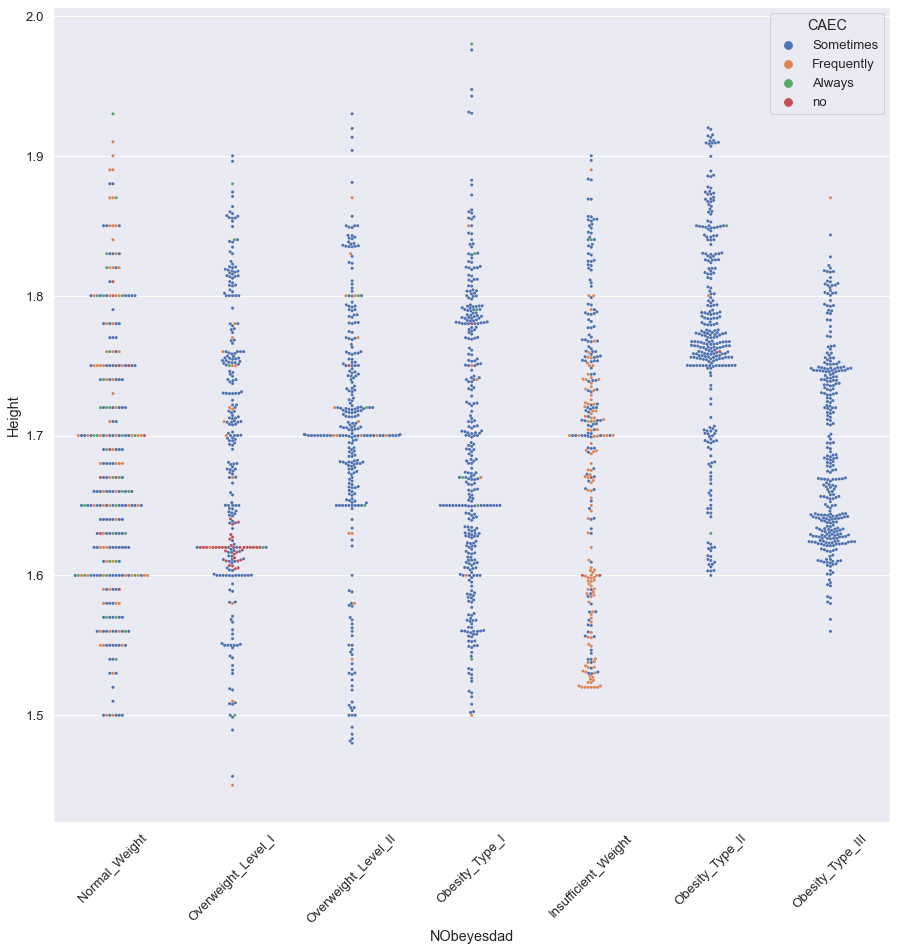

In [19]:
plt.figure(figsize=(15, 15))
sns.swarmplot(x='NObeyesdad', y='Height', data=df,
              hue='CAEC', size=3)
plt.xticks(rotation=45)
None

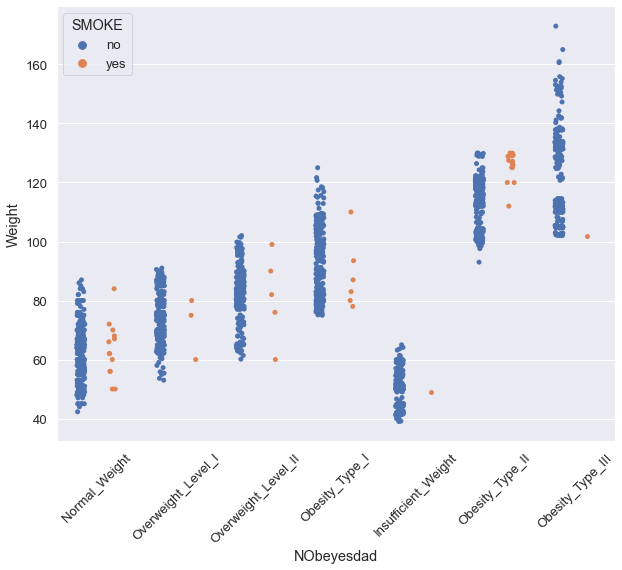

In [20]:
sns.stripplot(x='NObeyesdad', y='Weight', data=df, dodge=True,
              hue='SMOKE')
plt.xticks(rotation=45)
None

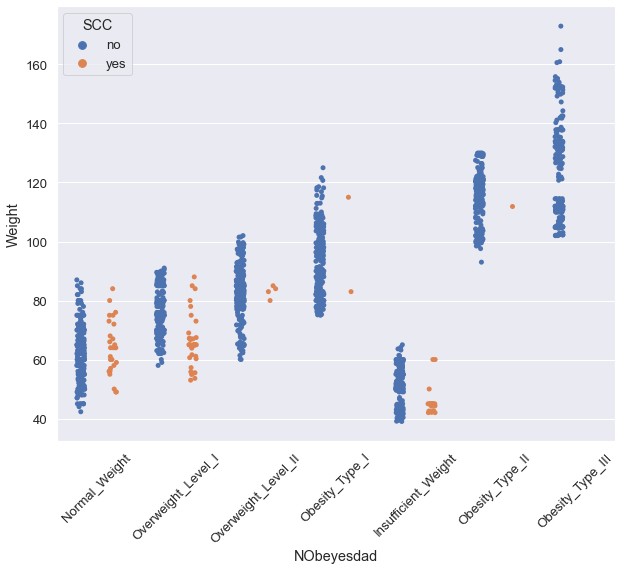

In [21]:
sns.stripplot(x='NObeyesdad', y='Weight', data=df, dodge=True,
              hue='SCC')
plt.xticks(rotation=45)
None

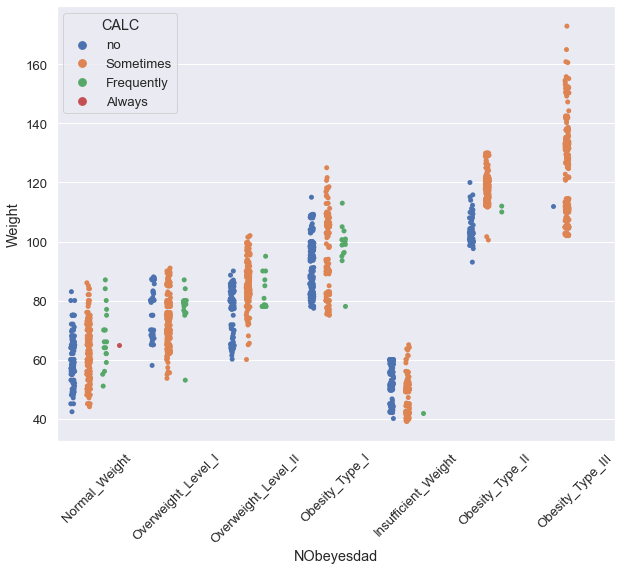

In [22]:
sns.stripplot(x='NObeyesdad', y='Weight', data=df,
              hue='CALC', dodge=True)
plt.xticks(rotation=45)
None

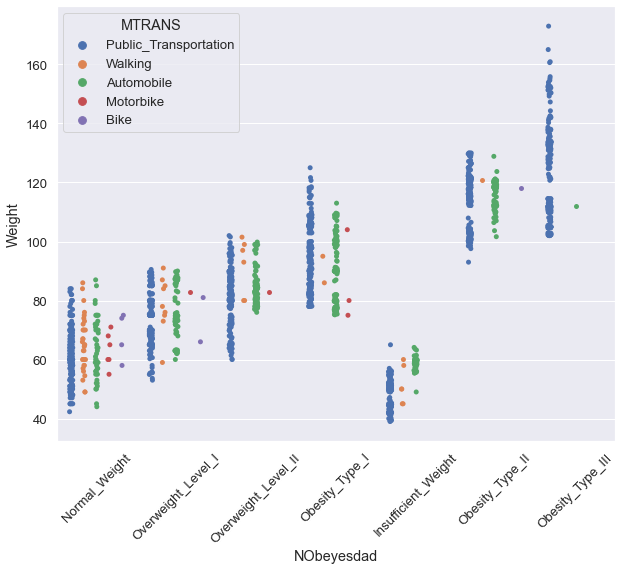

In [23]:
plt.figure(figsize=(10, 8))
sns.stripplot(x='NObeyesdad', y='Weight', data=df,
              hue='MTRANS', dodge=True)
plt.xticks(rotation=45)
None

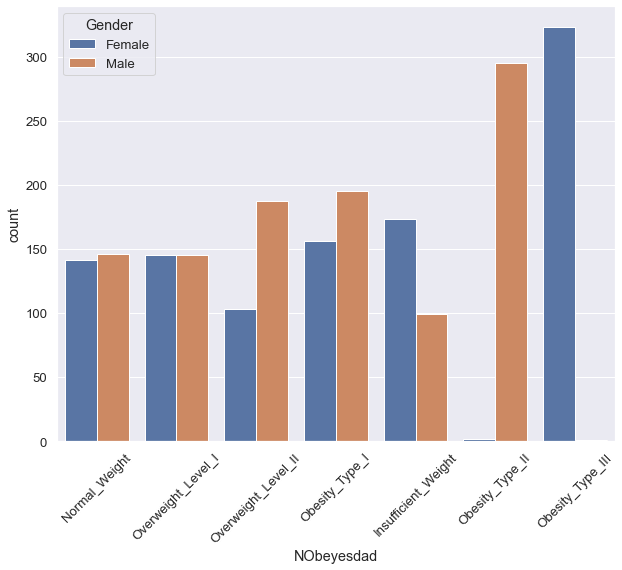

In [24]:
sns.countplot(data=df, x='NObeyesdad', hue='Gender')
plt.xticks(rotation=45)
None

<AxesSubplot:xlabel='SMOKE', ylabel='count'>

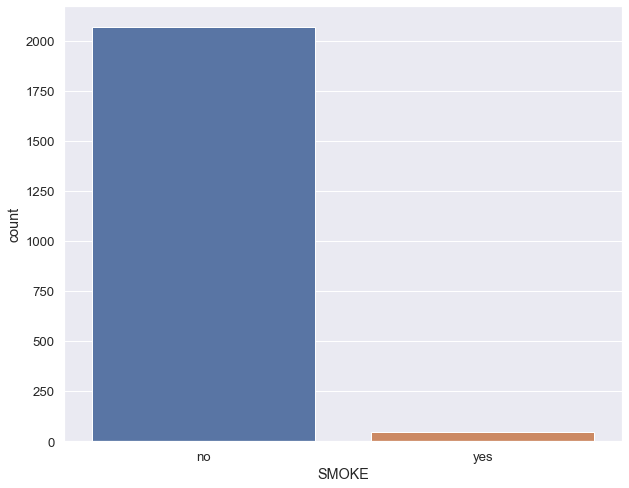

In [25]:
sns.countplot(data=df, x='SMOKE')

<AxesSubplot:xlabel='FAVC', ylabel='count'>

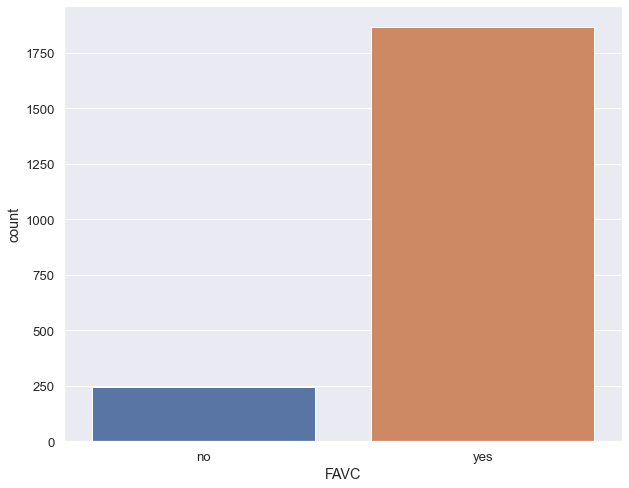

In [26]:
sns.countplot(data=df, x='FAVC')

<AxesSubplot:xlabel='CAEC', ylabel='count'>

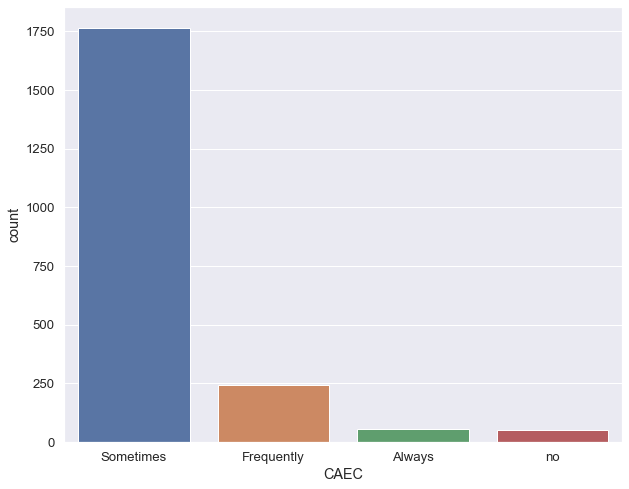

In [27]:
sns.countplot(data=df, x='CAEC')

<AxesSubplot:xlabel='MTRANS', ylabel='count'>

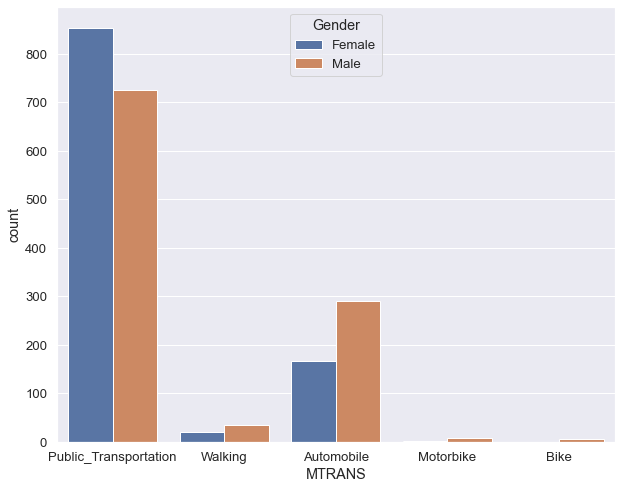

In [28]:
sns.countplot(data=df, x='MTRANS', hue='Gender')

In [29]:
for col in ordinial+nominal:
    print(col, '\n')
    print(df[col].value_counts(), '\n')
    print('*'*50)

NObeyesdad 

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64 

**************************************************
CALC 

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64 

**************************************************
CAEC 

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64 

**************************************************
FCVC 

2.0    1013
3.0     996
1.0     102
Name: FCVC, dtype: int64 

**************************************************
FAF 

1.0    776
0.0    720
2.0    496
3.0    119
Name: FAF, dtype: int64 

**************************************************
NCP 

3.0    1470
1.0     316
2.0     176
4.0     149
Name: NCP, dtype: int64 

**************************************************
MTRANS 

Publ

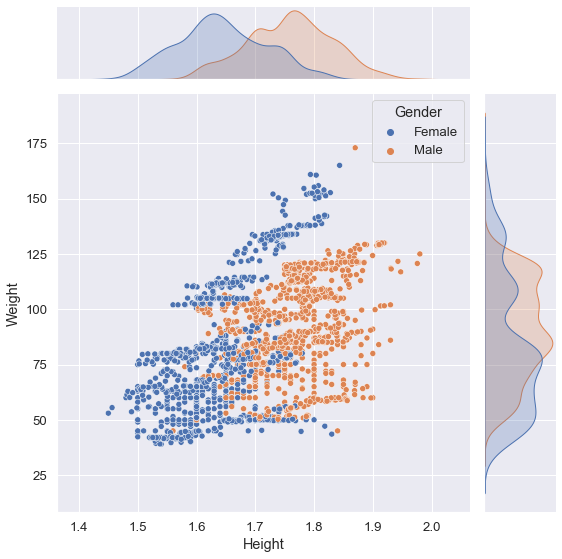

In [30]:
sns.jointplot(x='Height', y='Weight', data=df, hue='Gender', height=8)

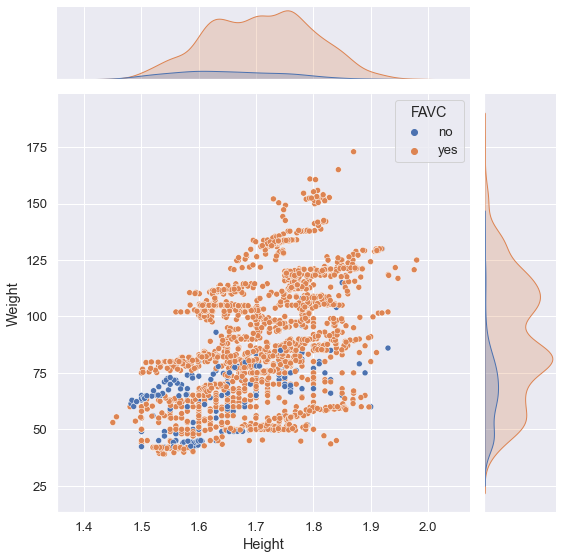

In [31]:
sns.jointplot(x='Height', y='Weight', data=df, hue='FAVC', height=8)

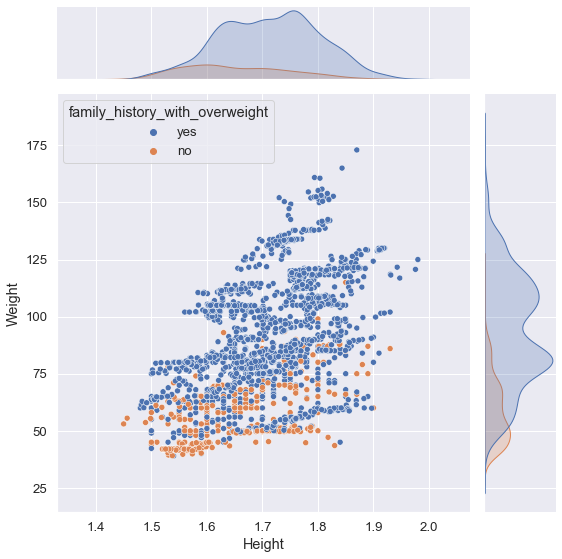

In [32]:
sns.jointplot(x='Height', y='Weight', data=df,
              hue='family_history_with_overweight', height=8)

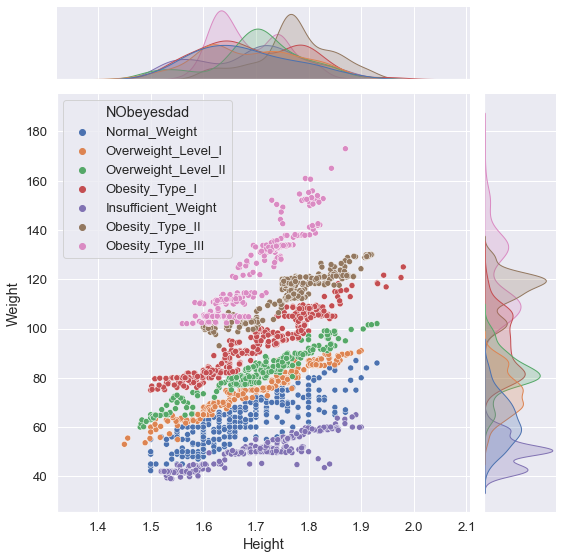

In [33]:
sns.jointplot(x='Height', y='Weight', data=df, hue='NObeyesdad', height=8)

# DATA Preprocessing

## DATA Cleaning

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [35]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.423496,2.687826,2.008011,1.006632,0.657866
std,6.345968,0.093305,26.191172,0.583905,0.809680,0.612953,0.895462,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,3.000000,1.584812,0.000000,0.000000
50%,22.777890,1.700499,83.000000,2.000000,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [36]:
for col in nominal+ordinial:
    print(col, '\n')
    print(df[col].value_counts(), '\n')
    print('*'*50)

MTRANS 

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64 

**************************************************
SCC 

no     2015
yes      96
Name: SCC, dtype: int64 

**************************************************
SMOKE 

no     2067
yes      44
Name: SMOKE, dtype: int64 

**************************************************
FAVC 

yes    1866
no      245
Name: FAVC, dtype: int64 

**************************************************
Gender 

Male      1068
Female    1043
Name: Gender, dtype: int64 

**************************************************
family_history_with_overweight 

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64 

**************************************************
NObeyesdad 

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal

## Dealing with outliers

In [37]:
for col in numerical:
    outliers = detect_outliers(df, 0, [col])
    df.drop(outliers, inplace=True)
    print(len(outliers))

168
1
0
0
0


Dropping outliers gave the best results

In [38]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1942 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1942 non-null   object 
 1   Age                             1942 non-null   float64
 2   Height                          1942 non-null   float64
 3   Weight                          1942 non-null   float64
 4   family_history_with_overweight  1942 non-null   object 
 5   FAVC                            1942 non-null   object 
 6   FCVC                            1942 non-null   float64
 7   NCP                             1942 non-null   float64
 8   CAEC                            1942 non-null   object 
 9   SMOKE                           1942 non-null   object 
 10  CH2O                            1942 non-null   float64
 11  SCC                             1942 non-null   object 
 12  FAF                             19

In [40]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000
mean,22.946080,1.705126,86.630618,2.432029,2.696704,2.018523,1.019053,0.695322
std,4.305943,0.092175,26.861181,0.592121,0.808367,0.611406,0.891397,0.608545
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.634724,1.632918,65.000000,2.000000,3.000000,1.616208,0.000000,0.041276
50%,22.000000,1.703231,83.402528,2.000000,3.000000,2.000000,1.000000,0.681950
75%,25.902283,1.770540,108.303827,3.000000,3.000000,2.494541,2.000000,1.000000
max,35.000000,1.975663,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Categorical DATA

### ordinal encoding

In [41]:
CAEC_CALC_Encoding = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3}

In [42]:
df['CALC'] = df['CALC'].map(CAEC_CALC_Encoding)
df['CAEC'] = df['CAEC'].map(CAEC_CALC_Encoding)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,1,no,2.000000,no,0.0,1.000000,0,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,1,yes,3.000000,yes,3.0,0.000000,1,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,1,no,2.000000,no,2.0,1.000000,2,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,1,no,2.000000,no,2.0,0.000000,2,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,1,no,2.000000,no,0.0,0.000000,1,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,1,no,1.728139,no,2.0,0.906247,1,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,1,no,2.005130,no,1.0,0.599270,1,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,1,no,2.054193,no,1.0,0.646288,1,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,1,no,2.852339,no,1.0,0.586035,1,Public_Transportation,Obesity_Type_III


In [43]:
NObeyesdad_Enconding = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6}

In [44]:
df['NObeyesdad'] = df['NObeyesdad'].map(NObeyesdad_Enconding)

### One hot encoding

In [45]:
df = pd.get_dummies(df, drop_first=True, columns=nominal)
df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,SCC_yes,SMOKE_yes,FAVC_yes,Gender_Male,family_history_with_overweight_yes
0,21.000000,1.620000,64.000000,2.0,3.0,1,2.000000,0.0,1.000000,0,1,0,0,1,0,0,0,0,0,1
1,21.000000,1.520000,56.000000,3.0,3.0,1,3.000000,3.0,0.000000,1,1,0,0,1,0,1,1,0,0,1
2,23.000000,1.800000,77.000000,2.0,3.0,1,2.000000,2.0,1.000000,2,1,0,0,1,0,0,0,0,1,1
3,27.000000,1.800000,87.000000,3.0,3.0,1,2.000000,2.0,0.000000,2,2,0,0,0,1,0,0,0,1,0
4,22.000000,1.780000,89.800000,2.0,1.0,1,2.000000,0.0,0.000000,1,3,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1,1.728139,2.0,0.906247,1,6,0,0,1,0,0,0,1,0,1
2107,21.982942,1.748584,133.742943,3.0,3.0,1,2.005130,1.0,0.599270,1,6,0,0,1,0,0,0,1,0,1
2108,22.524036,1.752206,133.689352,3.0,3.0,1,2.054193,1.0,0.646288,1,6,0,0,1,0,0,0,1,0,1
2109,24.361936,1.739450,133.346641,3.0,3.0,1,2.852339,1.0,0.586035,1,6,0,0,1,0,0,0,1,0,1


## Splitting DATA

In [46]:
x = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=80)

In [48]:
print(f"x: {x.shape}\ny: {y.shape}\n")
print(f"x_train: {x_train.shape}\nx_test: {x_test.shape}\n\ny_train: {y_train.shape}\ny_test: {y_test.shape}")

x: (1942, 19)
y: (1942,)

x_train: (1553, 19)
x_test: (389, 19)

y_train: (1553,)
y_test: (389,)


## Dealing with imbalanced classes

In [49]:
y_train.value_counts()

6    258
4    223
5    220
1    219
3    212
0    211
2    210
Name: NObeyesdad, dtype: int64

In [50]:
sammpler = SMOTE(random_state=80)
x_train, y_train = sammpler.fit_resample(x_train, y_train)

In [51]:
y_train.value_counts()

0    258
1    258
2    258
3    258
4    258
5    258
6    258
Name: NObeyesdad, dtype: int64

## Feature scaling

In [52]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Machine Learning

In [53]:
models = {
    "LR": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(use_label_encoder=False, eval_metric='merror'),
    "Naive Bayes": GaussianNB()
}

In [54]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------\n')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(
        f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}\n')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n')
    print(classification_report(y_test, y_pred))

    print('*'*50, '\n')

Training Model LR 
--------------

Training Accuracy: 0.8898117386489479
Testing Accuracy: 0.8997429305912596

Testing Confusion Matrix: 
[[60  0  0  0  0  0  0]
 [ 8 46  6  1  0  0  0]
 [ 0  5 45  8  0  0  0]
 [ 0  0  3 34  2  0  0]
 [ 0  0  1  2 52  0  2]
 [ 0  0  0  0  1 47  0]
 [ 0  0  0  0  0  0 66]]

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        60
           1       0.90      0.75      0.82        61
           2       0.82      0.78      0.80        58
           3       0.76      0.87      0.81        39
           4       0.95      0.91      0.93        57
           5       1.00      0.98      0.99        48
           6       0.97      1.00      0.99        66

    accuracy                           0.90       389
   macro avg       0.90      0.90      0.90       389
weighted avg       0.90      0.90      0.90       389

************************************************** 

Training Model KNN 
--------------

Traini

* The best model is XGBoost with a testing accuracy of 0.982
* but the training accuracy is 1
* I will try some methods to avoid the situation of overfitting 

### Grid Search for LogisticRegression model

**The LogisticRegression model had:**
* Training Accuracy: 0.8898117386489479
* Testing Accuracy: 0.8997429305912596

** This seems to be improvable with grid search **

In [55]:
model = LogisticRegression(max_iter=2000)
params = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}
grid_search = GridSearchCV(
    estimator=model, param_grid=params, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(x_train, y_train)

C:\Anaconda\envs\aipnd\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.59804174        nan 0.66720688        nan 0.76301719
        nan 0.87044199        nan 0.9368938         nan 0.95959791
        nan 0.96458257]
  warnings.warn(


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=2000), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [56]:
grid_search.best_score_

0.9645825659914056

In [57]:
grid_search.best_params_

{'C': 1000.0, 'penalty': 'l2'}

In [58]:
model = grid_search.best_estimator_

In [59]:
model.fit(x_train, y_train)

LogisticRegression(C=1000.0, max_iter=2000)

In [60]:
y_pred = model.predict(x_test)
print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n')
print(classification_report(y_test, y_pred))

Training Accuracy: 0.991140642303433
Testing Accuracy: 0.9794344473007712

Testing Confusion Matrix: 
[[60  0  0  0  0  0  0]
 [ 2 59  0  0  0  0  0]
 [ 0  0 56  2  0  0  0]
 [ 0  0  1 38  0  0  0]
 [ 0  0  0  1 54  0  2]
 [ 0  0  0  0  0 48  0]
 [ 0  0  0  0  0  0 66]]

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       1.00      0.97      0.98        61
           2       0.98      0.97      0.97        58
           3       0.93      0.97      0.95        39
           4       1.00      0.95      0.97        57
           5       1.00      1.00      1.00        48
           6       0.97      1.00      0.99        66

    accuracy                           0.98       389
   macro avg       0.98      0.98      0.98       389
weighted avg       0.98      0.98      0.98       389



The accuracy increased by 9% and beacame close to the XGBoost model

The improvement is awesome

**let's try grid search with SVC**

### Grid Search for SVC model

**The SVC model had:**
* Training Accuracy: 0.9307862679955703
* Testing Accuracy: 0.8920308483290489

**This also seems to be improvable with grid search**

In [61]:
model = SVC()
params = [
    {'C': [1, 10, 100], 'kernel':['linear', 'sigmoid', 'poly']},
    {'C': [1, 10, 100], 'kernel':['rbf'],
     'gamma':[0.5, 0.6, 0.7, 0.1, 0.01, 0.01]}
]

grid_search = GridSearchCV(
    estimator=model, param_grid=params, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100],
                          'kernel': ['linear', 'sigmoid', 'poly']},
                         {'C': [1, 10, 100],
                          'gamma': [0.5, 0.6, 0.7, 0.1, 0.01, 0.01],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [62]:
grid_search.best_score_

0.9695518723143032

In [63]:
grid_search.best_params_

{'C': 10, 'kernel': 'linear'}

In [64]:
model = grid_search.best_estimator_

In [65]:
model.fit(x_train, y_train)

SVC(C=10, kernel='linear')

In [66]:
y_pred = model.predict(x_test)
print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n')
print(classification_report(y_test, y_pred))

Training Accuracy: 0.9850498338870431
Testing Accuracy: 0.9845758354755784

Testing Confusion Matrix: 
[[60  0  0  0  0  0  0]
 [ 2 59  0  0  0  0  0]
 [ 0  0 58  0  0  0  0]
 [ 0  0  1 38  0  0  0]
 [ 0  0  0  3 54  0  0]
 [ 0  0  0  0  0 48  0]
 [ 0  0  0  0  0  0 66]]

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       1.00      0.97      0.98        61
           2       0.98      1.00      0.99        58
           3       0.93      0.97      0.95        39
           4       1.00      0.95      0.97        57
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        66

    accuracy                           0.98       389
   macro avg       0.98      0.98      0.98       389
weighted avg       0.99      0.98      0.98       389



* The accuracy of 0.9848 is the heighest , even higher than the XGBoost of 0.982
* The Training Accuracy and the Testing Accuracy is alomst equal so there is no overfitting

**The final model is SVC**

In [67]:
model = SVC(C=10, kernel='linear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')

Training Accuracy: 0.9850498338870431
Testing Accuracy: 0.9845758354755784


## Exporting the model and the scaler

In [68]:
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']